In [92]:
import cv2
import datetime as dt
import h5py
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
import os
import pandas as pd
from glob import glob
from sklearn.model_selection import train_test_split

In [126]:
def create_h5_record (images, file_name, dataset, size=256):
    start = dt.datetime.now()
    print('creating record: ' + dataset)
    
    # Size of data
    NUM_IMAGES = len(images)
    HEIGHT = size
    WIDTH = size
    CHANNELS = 3
    SHAPE = (HEIGHT, WIDTH, CHANNELS)
    
    # generate file
    with h5py.File(file_name, 'w') as hf:
        # Images
        Xset = hf.create_dataset(
            name='X_' + str(dataset),
            shape=(NUM_IMAGES, HEIGHT, WIDTH, CHANNELS),
            maxshape=(NUM_IMAGES, HEIGHT, WIDTH, CHANNELS),
            compression="gzip",
            compression_opts=9,
            dtype='i')
        
        #Labels
        yset = hf.create_dataset(
            name='Y_' + str(dataset),
            shape=(1, NUM_IMAGES),
            maxshape=(None, NUM_IMAGES),
            compression="gzip",
            compression_opts=9,
            dtype='i')
        
        # iterate over each image
        for i,img in enumerate(images):   
            print(str(i) + '/' + str(NUM_IMAGES), end="\r")
            # resize and compress each image
            image = cv2.imread(img)
            try:
                image = cv2.resize(image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC)
            except:
                print("image: " + img + " failed resize")
                print("Unexpected error:", sys.exc_info()[0])
                return
            Xset[i] = image
            
            # get value based on url
            yset[0, i] = 1 if 'potholes' in img else 0 
        end=dt.datetime.now()
        print("\r", i, ": ", (end-start).seconds, "seconds", end="")

In [130]:
def process_images():
    # base path
    PATH = os.path.join(os.getcwd(), 'data')
    
    # get image paths
    IMAGES = glob(os.path.join(PATH, 'normal', '*.jpg'))
    IMAGES += glob(os.path.join(PATH, 'potholes', '*.jpg'))
    
    # shuffle images
    np.random.seed(332)
    np.random.shuffle(IMAGES)
    
    # split for train, dev, and test
    data = np.asarray(IMAGES)
    train, test = train_test_split(data, test_size = 0.30, random_state = 42)
    dev, test = train_test_split(test, test_size=0.50, random_state = 56)
    
#     create_h5_record(train, './data/train.h5', 'train', 128)
#     create_h5_record(test, './data/another.h5', 'test', 128)
#     create_h5_record(dev, './data/dev.h5', 'dev', 128)

    return train, test, dev

In [131]:
train, test, dev = process_images()

1


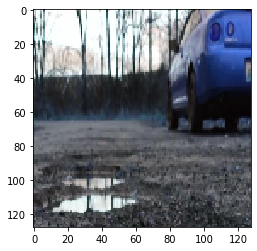

In [121]:
# Check everything went right

with h5py.File('./data/train.h5', 'r') as hf:
    train_set_x_orig = np.array(hf["X_train"][:])
    train_set_y_orig = np.array(hf["Y_train"][:])
    index = 41
    plt.imshow(train_set_x_orig[index])
    print(train_set_y_orig[0, index])